In [42]:
"""
Functions from eda.py 

load_csv(string)
check_df(dataframe, head=5)
cat_summary(dataframe, col_name, plot=False)
num_summary(dataframe, numerical_col, plot=False)
grab_col_names(dataframe, cat_th=10, car_th=20)
target_summary_with_cat(dataframe, target, categorical_col)
target_summary_with_num(dataframe, target, numerical_col)
high_correlated_cols(dataframe, plot=False, corr_th=0.90)
target_correlation_matrix(dataframe, corr_th=0.5, target="Salary")

""";

In [43]:
"""
Functions from data_prep.py

outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75)
eplace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75)
check_outlier(dataframe, col_name, q1=.25, q3=.75)
grab_outliers(dataframe, col_name, index=False)
remove_outlier(dataframe, col_name)
missing_values_table(dataframe, na_name=False)
missing_vs_target(dataframe, target, na_columns)
label_encoder(dataframe, binary_col)
one_hot_encoder(dataframe, categorical_cols, drop_first=False)
rare_analyser(dataframe, target, cat_cols)
rare_encoder(dataframe, rare_perc)

""";

In [44]:
#Better to check  definitions of functions before reweving the code.

In [1]:
import pandas as pd
from Helpers.data_prep import *
from Helpers.eda import *

import warnings

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)



In [2]:
df=pd.read_csv("hitters.csv")

In [3]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
len(df.columns)

20

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [8]:
check_df(df) #understading data. 59 NA values in salary (target column)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

# analyzing dependent variable

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Salary"].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

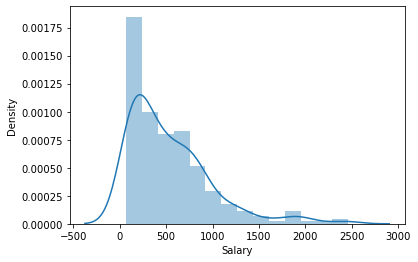

In [10]:
sns.distplot(df.Salary)
plt.show()

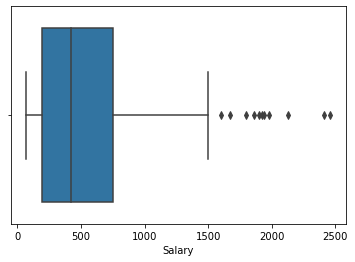

In [11]:
sns.boxplot(df.Salary)
plt.show()

# taking numerical and categorical columns

In [12]:
cat_cols,num_cols,cat_but_car=grab_col_names(df) #cat_but_car means it looks like categoric but it is actually cardinal 

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [13]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [14]:
cat_cols

['League', 'Division', 'NewLeague']

In [15]:
rare_analyser(df,"Salary",cat_cols)

League : 2
   COUNT     RATIO  TARGET_MEAN
A    175  0.543478   541.999547
N    147  0.456522   529.117500


Division : 2
   COUNT     RATIO  TARGET_MEAN
E    157  0.487578   624.271364
W    165  0.512422   450.876873


NewLeague : 2
   COUNT     RATIO  TARGET_MEAN
A    176  0.546584   537.113028
N    146  0.453416   534.553852




count    322.000000
mean     380.928571
std      153.404981
min       16.000000
5%       161.000000
10%      194.100000
20%      221.800000
30%      281.300000
40%      321.800000
50%      379.500000
60%      430.200000
70%      490.000000
80%      535.600000
90%      584.900000
95%      609.900000
99%      658.590000
max      687.000000
Name: AtBat, dtype: float64



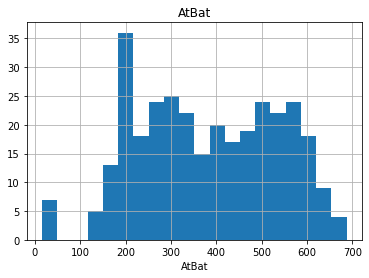

count    322.000000
mean     101.024845
std       46.454741
min        1.000000
5%        39.000000
10%       45.100000
20%       57.000000
30%       70.000000
40%       82.000000
50%       96.000000
60%      113.000000
70%      128.700000
80%      144.000000
90%      163.000000
95%      174.000000
99%      210.790000
max      238.000000
Name: Hits, dtype: float64



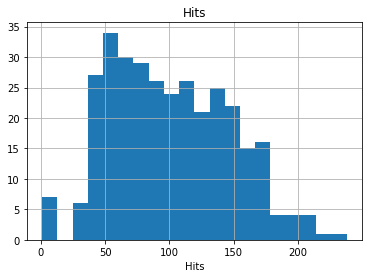

count    322.000000
mean      10.770186
std        8.709037
min        0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        5.000000
40%        6.000000
50%        8.000000
60%       10.600000
70%       14.000000
80%       18.000000
90%       24.000000
95%       28.950000
99%       33.000000
max       40.000000
Name: HmRun, dtype: float64



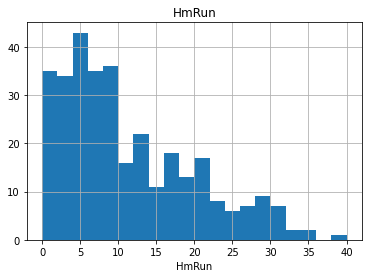

count    322.000000
mean      50.909938
std       26.024095
min        0.000000
5%        17.000000
10%       20.100000
20%       27.000000
30%       33.000000
40%       41.000000
50%       48.000000
60%       55.600000
70%       66.000000
80%       75.800000
90%       89.000000
95%       94.000000
99%      107.790000
max      130.000000
Name: Runs, dtype: float64



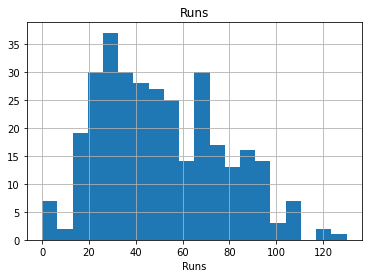

count    322.000000
mean      48.027950
std       26.166895
min        0.000000
5%        14.000000
10%       19.000000
20%       26.000000
30%       30.000000
40%       36.400000
50%       44.000000
60%       49.000000
70%       58.000000
80%       73.000000
90%       86.000000
95%       96.000000
99%      112.370000
max      121.000000
Name: RBI, dtype: float64



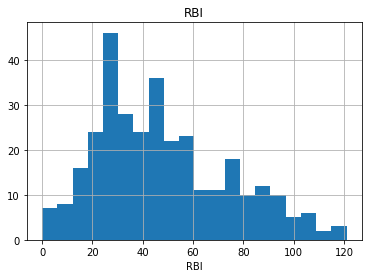

count    322.000000
mean      38.742236
std       21.639327
min        0.000000
5%        11.050000
10%       15.000000
20%       20.000000
30%       24.000000
40%       30.000000
50%       35.000000
60%       40.000000
70%       48.700000
80%       59.000000
90%       69.900000
95%       78.000000
99%       93.580000
max      105.000000
Name: Walks, dtype: float64



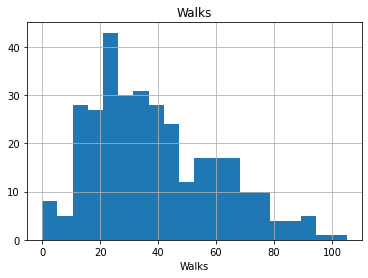

count    322.000000
mean       7.444099
std        4.926087
min        1.000000
5%         1.000000
10%        2.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        7.600000
70%       10.000000
80%       12.000000
90%       15.000000
95%       17.000000
99%       19.790000
max       24.000000
Name: Years, dtype: float64



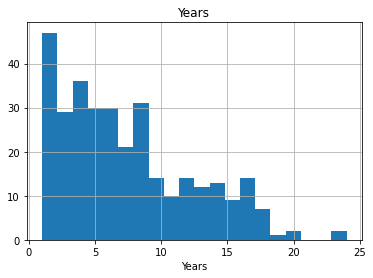

count      322.00000
mean      2648.68323
std       2324.20587
min         19.00000
5%         216.50000
10%        342.20000
20%        667.60000
30%        963.40000
40%       1402.20000
50%       1928.00000
60%       2654.00000
70%       3365.00000
80%       4483.00000
90%       6123.40000
95%       7125.60000
99%       8749.97000
max      14053.00000
Name: CAtBat, dtype: float64



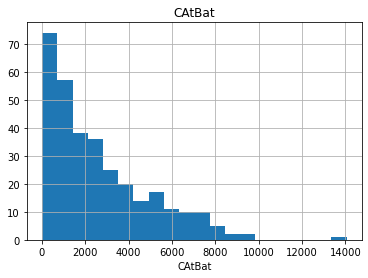

count     322.000000
mean      717.571429
std       654.472627
min         4.000000
5%         54.000000
10%        86.000000
20%       164.600000
30%       238.000000
40%       355.800000
50%       508.000000
60%       708.200000
70%       911.100000
80%      1229.200000
90%      1659.600000
95%      2017.150000
99%      2500.340000
max      4256.000000
Name: CHits, dtype: float64



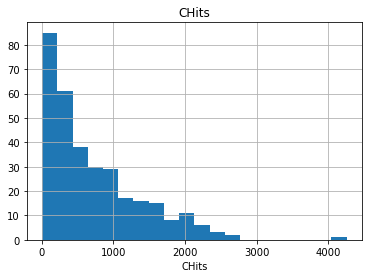

count    322.000000
mean      69.490683
std       86.266061
min        0.000000
5%         2.000000
10%        4.000000
20%       10.200000
30%       16.300000
40%       27.400000
50%       37.500000
60%       51.200000
70%       72.400000
80%      103.800000
90%      194.900000
95%      265.650000
99%      373.120000
max      548.000000
Name: CHmRun, dtype: float64



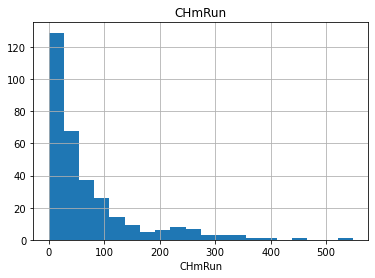

count     322.000000
mean      358.795031
std       334.105886
min         1.000000
5%         27.000000
10%        38.100000
20%        80.400000
30%       117.300000
40%       181.000000
50%       247.000000
60%       333.000000
70%       443.400000
80%       627.200000
90%       895.700000
95%      1032.300000
99%      1174.370000
max      2165.000000
Name: CRuns, dtype: float64



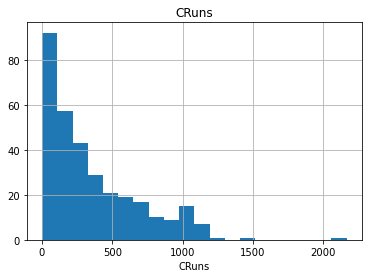

count     322.000000
mean      330.118012
std       333.219617
min         0.000000
5%         22.050000
10%        34.100000
20%        70.200000
30%       106.300000
40%       149.000000
50%       220.500000
60%       303.600000
70%       379.100000
80%       496.200000
90%       861.600000
95%      1071.750000
99%      1310.850000
max      1659.000000
Name: CRBI, dtype: float64



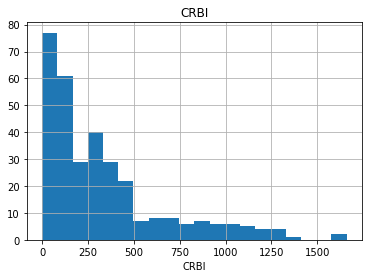

count     322.000000
mean      260.239130
std       267.058085
min         0.000000
5%         15.050000
10%        30.100000
20%        55.000000
30%        82.000000
40%       117.400000
50%       170.500000
60%       226.600000
70%       300.700000
80%       421.000000
90%       643.900000
95%       817.600000
99%      1139.140000
max      1566.000000
Name: CWalks, dtype: float64



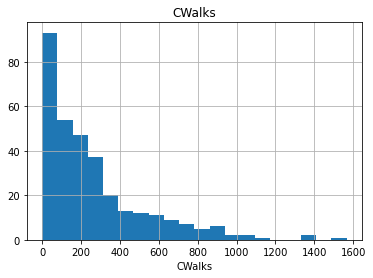

count     322.000000
mean      288.937888
std       280.704614
min         0.000000
5%         33.200000
10%        62.200000
20%        99.600000
30%       132.000000
40%       167.000000
50%       212.000000
60%       257.400000
70%       303.000000
80%       365.800000
90%       685.600000
95%       910.650000
99%      1301.190000
max      1378.000000
Name: PutOuts, dtype: float64



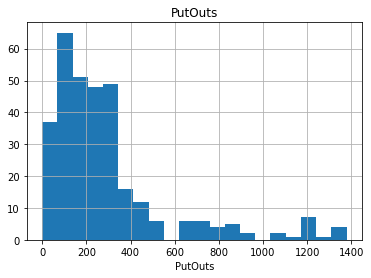

count    322.000000
mean     106.913043
std      136.854876
min        0.000000
5%         0.000000
10%        2.000000
20%        5.200000
30%        9.000000
40%       15.400000
50%       39.500000
60%       76.800000
70%      134.800000
80%      210.800000
90%      353.300000
95%      431.450000
99%      478.160000
max      492.000000
Name: Assists, dtype: float64



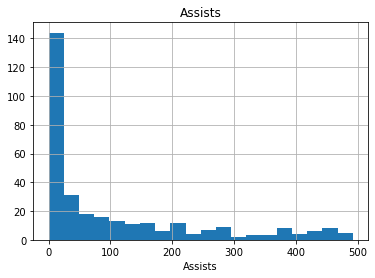

count    322.000000
mean       8.040373
std        6.368359
min        0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        8.000000
70%       10.000000
80%       13.000000
90%       17.000000
95%       20.000000
99%       25.790000
max       32.000000
Name: Errors, dtype: float64



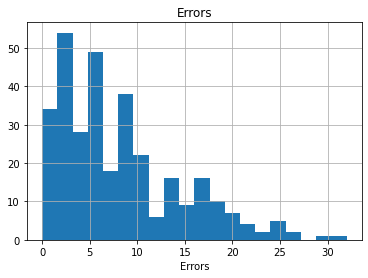

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
5%         86.600000
10%       100.000000
20%       155.000000
30%       221.000000
40%       300.000000
50%       425.000000
60%       538.000000
70%       700.000000
80%       809.000000
90%      1048.666600
95%      1346.000000
99%      2032.886540
max      2460.000000
Name: Salary, dtype: float64



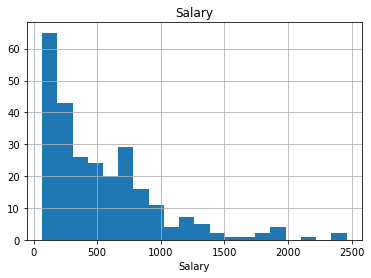

In [16]:
for col in num_cols:
    num_summary(df,col,plot=True)

In [17]:
for col in num_cols:
    print(col,check_outlier(df,col,q1=0.1,q3=0.9)) #cheking outlier

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


(322, 20)
(308, 20)


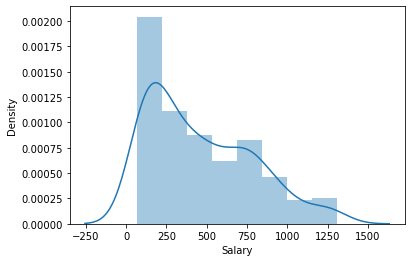

In [18]:
#I am taking out the values starts after 1300(LOOK AT BOXPLOT ABOVE!) 

print(df.shape)
df = df[(df['Salary'] < 1350) | (df['Salary'].isnull())]  #null values also are needed
print(df.shape)
sns.distplot(df.Salary)
plt.show()
#more normal than before

In [19]:
# clip our outliers
for col in num_cols:
    if check_outlier(df, col, q1=0.05, q3=0.95):
        replace_with_thresholds(df, col, q1=0.05, q3=0.95)


In [20]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.05, q3=0.95))#already clipped:)

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [21]:

# Missing value

missing_values_table(df)
#it is not correct to fill those missing values that target column contains. It affects our prediction
#we can take them out just before feeding to the model

        n_miss  ratio
Salary      59  19.16


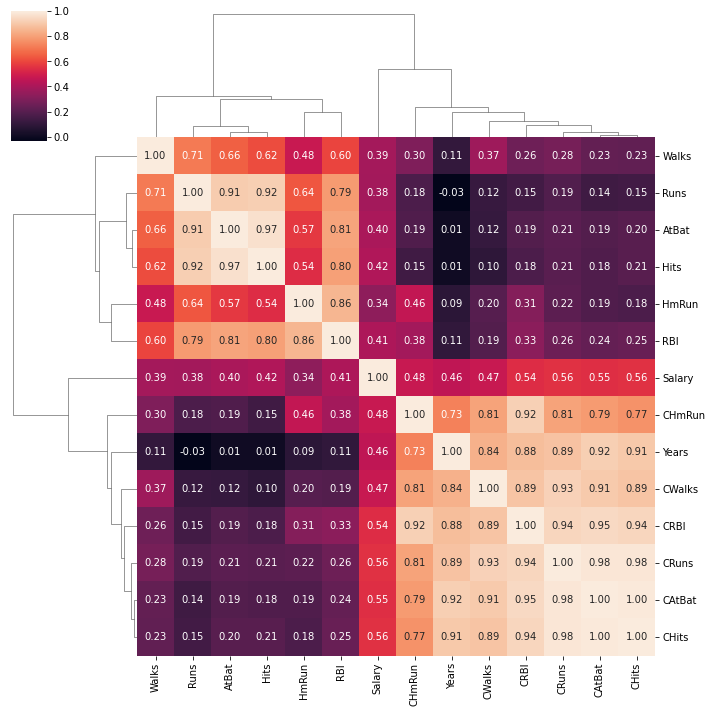

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [22]:
# Correlation analyze

import numpy as np

target_correlation_matrix(df, corr_th=0.3, target="Salary")
high_correlated_cols(df, plot=False, corr_th=0.90)

In [23]:
# Data pre-processing
#creting some columns that can help me for prediction. 
#we will see in the feature importance that how much those help me during prediction
############################################

df['NEW_HitRatio'] = df['Hits'] / df['AtBat']
df['NEW_RunRatio'] = df['HmRun'] / df['Runs']
df['NEW_CHitRatio'] = df['CHits'] / df['CAtBat']
df['NEW_CRunRatio'] = df['CHmRun'] / df['CRuns']

df['NEW_Avg_AtBat'] = df['CAtBat'] / df['Years']
df['NEW_Avg_Hits'] = df['CHits'] / df['Years']
df['NEW_Avg_HmRun'] = df['CHmRun'] / df['Years']
df['NEW_Avg_Runs'] = df['CRuns'] / df['Years']
df['NEW_Avg_RBI'] = df['CRBI'] / df['Years']
df['NEW_Avg_Walks'] = df['CWalks'] / df['Years']


In [24]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_HitRatio,NEW_RunRatio,NEW_CHitRatio,NEW_CRunRatio,NEW_Avg_AtBat,NEW_Avg_Hits,NEW_Avg_HmRun,NEW_Avg_Runs,NEW_Avg_RBI,NEW_Avg_Walks
0,293,66,1,30,29,14,1,293,66,1,...,0.225256,0.033333,0.225256,0.033333,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,0.257143,0.291667,0.242099,0.214953,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,0.271399,0.272727,0.281404,0.281250,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,0.284274,0.307692,0.279851,0.271739,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,0.271028,0.256410,0.255051,0.250000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,0.255533,0.107692,0.298187,0.084433,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000
318,492,136,5,76,50,94,12,5511,1511,39,...,0.276423,0.065789,0.274179,0.043478,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667
319,475,126,3,61,43,52,6,1700,433,7,...,0.265263,0.049180,0.254706,0.032258,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333
320,573,144,9,85,60,78,8,3198,857,97,...,0.251309,0.105882,0.267980,0.206383,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000


In [25]:
# One Hot Encoder

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [26]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,NEW_CRunRatio,NEW_Avg_AtBat,NEW_Avg_Hits,NEW_Avg_HmRun,NEW_Avg_Runs,NEW_Avg_RBI,NEW_Avg_Walks,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,0.033333,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,0.214953,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,...,0.281250,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,0.271739,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818,1,0,1
4,321,87,10,39,42,30,2,396,101,12,...,0.250000,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,0.084433,540.600000,161.200000,6.400000,75.800000,62.200000,27.600000,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,0.043478,459.250000,125.916667,3.250000,74.750000,37.583333,72.916667,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,...,0.032258,283.333333,72.166667,1.166667,36.166667,15.500000,24.333333,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,0.206383,399.750000,107.125000,12.125000,58.750000,52.500000,41.500000,0,0,0


In [27]:
############################################
# Modelling
############################################

df_null = df[df["Salary"].isnull()]  # seperating missing values.
df.dropna(inplace=True)  # getting rid of missing values

y = df['Salary']
X = df.drop("Salary", axis=1)


In [28]:
from sklearn.model_selection import train_test_split
##########################
# HOLD OUT - MODEL VALIDATION
##########################


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#installing before using
!pip3 install catboost

In [ ]:
!pip3 install lightgbm

In [31]:
##########################
# BASE MODELS
##########################


def all_models(X, y, test_size=0.2, random_state=12345, classification=True):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

    # All Base Models (Classification)
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from catboost import CatBoostClassifier
    from lightgbm import LGBMClassifier
    from sklearn.svm import SVC

    # ALL Base Models (Regression)
    from catboost import CatBoostRegressor
    from lightgbm import LGBMRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
    all_models = []

    if classification:
        models = [('LR', LogisticRegression(random_state=random_state)),
                  ('KNN', KNeighborsClassifier()),
                  ('CART', DecisionTreeClassifier(random_state=random_state)),
                  ('RF', RandomForestClassifier(random_state=random_state)),
                  ('SVM', SVC(gamma='auto', random_state=random_state)),
                  ('XGB', GradientBoostingClassifier(random_state=random_state)),
                  ("LightGBM", LGBMClassifier(random_state=random_state)),
                  ("CatBoost", CatBoostClassifier(verbose=False, random_state=random_state))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            values = dict(name=name, acc_train=acc_train, acc_test=acc_test)
            all_models.append(values)

        sort_method = False
    else:
        models = [('LR', LinearRegression()),
                  ("Ridge", Ridge()),
                  ("Lasso", Lasso()),
                  ("ElasticNet", ElasticNet()),
                  ('KNN', KNeighborsRegressor()),
                  ('CART', DecisionTreeRegressor()),
                  ('RF', RandomForestRegressor()),
                  ('SVR', SVR()),
                  ('GBM', GradientBoostingRegressor()),
                  ("XGBoost", XGBRegressor()),
                  ("LightGBM", LGBMRegressor()),
                  ("CatBoost", CatBoostRegressor(verbose=False))]

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            values = dict(name=name, RMSE_TRAIN=rmse_train, RMSE_TEST=rmse_test)
            all_models.append(values)

        sort_method = True
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[2], ascending=sort_method)
    print(all_models_df)
    return all_models_df




In [32]:
all_models = all_models(X, y, test_size=0.2, random_state=46, classification=False)#There is overfitting. Obviously:)


[23:05:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          name  RMSE_TRAIN   RMSE_TEST
11    CatBoost    4.970476  237.711877
6           RF   62.011782  257.306952
9      XGBoost   38.632333  258.976467
10    LightGBM   51.393878  259.163887
8          GBM   30.648325  262.948082
4          KNN  167.550142  268.996997
5         CART    0.000000  316.493265
3   ElasticNet  202.308046  328.042479
2        Lasso  200.519551  332.649995
1        Ridge  199.916969  333.874528
7          SVR  315.166508  336.098489
0           LR  198.591014  336.351661


In [45]:
# we have to stop iterations at "sweet spot" that doesn't go into overfitting, so we need to tune.


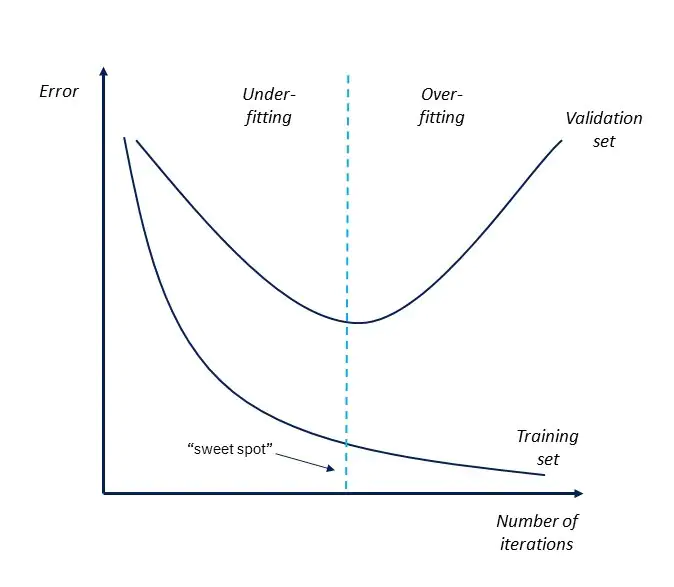

In [33]:
from sklearn.ensemble import RandomForestRegressor
##########################
# RANDOM FORESTS MODEL TUNING
##########################

# Paremetrs for tunning. 
rf_params = {"max_depth": [4, 5, 7, 10],
             "max_features": [4, 5, 6, 8, 10, 12],
             "n_estimators": [80, 100, 150, 250, 400, 500],
             "min_samples_split": [8, 10, 12, 15]}

# rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1).fit(X_train , y_train)
# rf_cv_model.best_params_

#after tunning

best_params = {'max_depth': 10,
               'max_features': 8,
               'min_samples_split': 10,
               'n_estimators': 80}

rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [34]:
# RANDOM FORESTS TUNED MODEL
rf_tuned = RandomForestRegressor(max_depth=10, max_features=8, n_estimators=80,
                                 min_samples_split=10, random_state=42).fit(X_train, y_train)


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# TUNED MODEL TRAIN ERROR
y_pred = rf_tuned.predict(X_train)

print("RF Tuned Model Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))

RF Tuned Model Train RMSE: 106.36720246290594


In [36]:
##########################
# TUNED MODEL TEST ERROR
##########################

y_pred = rf_tuned.predict(X_test)
print("RF Tuned Model Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RF Tuned Model Test RMSE: 156.2255503788663


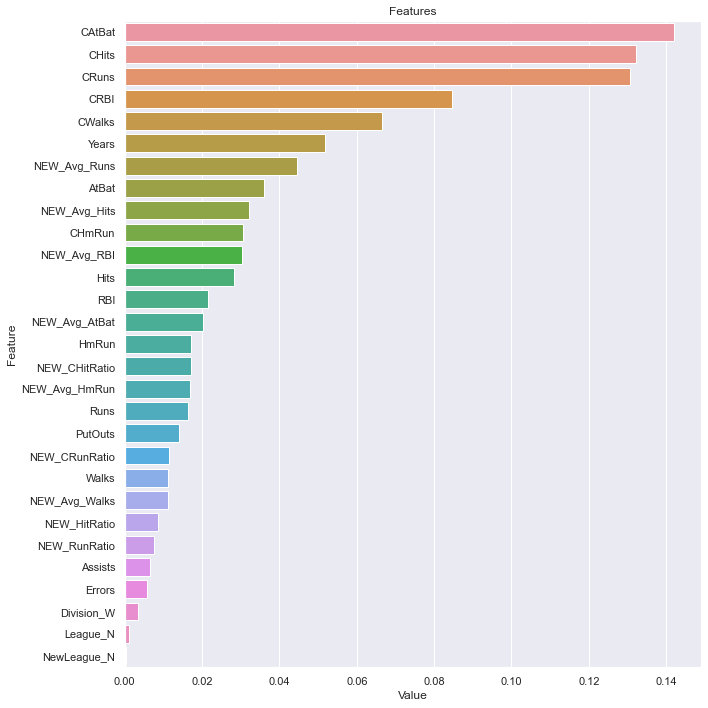

In [37]:
#######################################
# FEATURE IMPORTANCE
#######################################

def plot_importance(model, features, num=len(X), save=False):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_tuned, X_train)
#we see that some of our new features helped us a lot for prediction

In [38]:
# Saving tuned model
import pickle
pickle.dump(rf_tuned, open("rf_final_model.pkl", 'wb'))

In [39]:
# loading tuned model
df_prep = pickle.load(open('rf_final_model.pkl', 'rb'))

In [40]:
df_prep

RandomForestRegressor(max_depth=10, max_features=8, min_samples_split=10,
                      n_estimators=80, random_state=42)